# 3. Fundamental image processing techniques - 기본적인 영상 처리 기법

<hr>

## 1) Brightness Control of Image - 영상의 밝기 조절

<hr>

### Pixel Processing Technics of Image - 영상의 화소 처리 기법
<hr>

- 화소 처리(Point processing)
    - 입력 영상의 특정 좌표 픽셀 값을 변경하여 출력 영상의 해당 좌표 픽셀 값으로 설정하는 연산
    - 결과 영상의 픽셀 값이 정해진 범위(e.g., 그레이스케일)에 있어야 한다.
    - 반전, 밝기 조절, 명암비 조절 등
<hr>

$$dst(x, y) = f(src(x, y))$$
$$\Bigg\uparrow$$
$$\mathsf{변환 함수(transfer function)}$$
- 위 함수를 말로 해석해 보자면 입력 영상의 x, y에서의 픽셀 값{src(x, y)}을 어떤 함수를 거쳐감으로써 변화를 주고{f()},<br>
그 값을 출력 영상의 x, y에서의 픽셀 값{dst(x, y)}으로 하겠다.

<hr>

- 밝기 조절이란
    - 영상을 전체적으로 더욱 밝거나 어둡게 만드는 연산  
<hr>

- 밝기 조절 수식
$$dst(x, y) = saturate(src(x, y) + n)$$
<hr>

### Addition Operation for Brightness Control of Image - 영상의 밝기 조절을 위한 영상의 덧셈 연산
<hr>

> `덧셈 연산 함수`
$$\mathsf{cv2.add(src1, src2, dst, mask, dtype) -> dst}$$
- src1 : 1st source. (입력) 첫 번째 영상 또는 스칼라
- src2 : 2nd source. (입력) 두 번째 영상 또는 스칼라
- dst : destination. (출력) 덧셈 연산의 결과 영상
- mask : 마스크 영상(그레이스케일)
- dtype : data type. 출력 영상(dst)의 타입. (e.g.) cv2.CV_8U, cv2.CV_32F 등
- 참고사항 :
    - 스칼라(Scalar)는 실수 값 하나 또는 실수 값 네 개로 구성된 튜플
    - dst를 함수 파라미터에 전달하려면 dst의 크기가 src1, src2와 같아야 하며, 타입이 적절해야 한다.

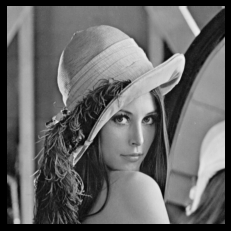

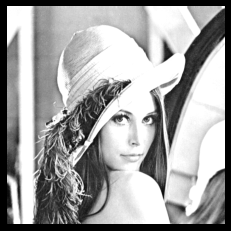

In [ ]:
## 그레이스케일 영상의 밝기 100만큼 증가시키기
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 입력 영상 불러오기
source = cv2.imread("./images/lenna.bmp", cv2.IMREAD_GRAYSCALE)

# 출력 영상
destination = cv2.add(source, 100)
# 각각의 엘리먼트 즉, 행렬의 원소의 값에 100을 더하는 브로드 캐스팅 형태로 동작한다.
# destination = np.clip(source + 100., 0, 255).astype(np.uint8)  # 증가 하려는 값은 실수형으로 입력한다,

# matplotlib 으로 출력
plt.imshow(source, cmap="gray")
plt.axis("off")
plt.show()
plt.imshow(destination, cmap="gray")
plt.axis("off")
plt.show()

# OpenCV 가상 윈도우에서 출력
cv2.imshow("src", source)
cv2.imshow("dst", destination)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

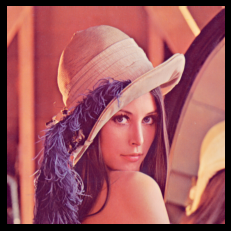

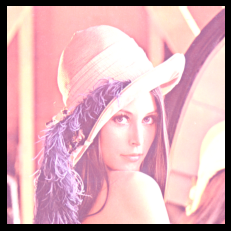

-1

In [ ]:
## 컬러 영상의 밝기 100만큼 증가시키기
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 입력 영상 불러오기
source = cv2.imread("./images/lenna.bmp")
source_BGR = source.copy()
source_RGB = cv2.cvtColor(source_BGR, cv2.COLOR_BGR2RGB)

# 출력 영상
# 주의사항 - 만약 컬러 영상의 밝기를 100만큼 증가시키기 위해 cv2.add() 함수의 src2에 인수로
#       - 단일 정수 값인 100을 입력한다면 cv2.add() 함수는 자동으로 (100, 0, 0, 0)의 튜플 형태로
#       - 변환하여 적용시킨다. 그로 인해 해당 영상은 전체적으로 밝기가 증가하는 대신 BGRA 중 B 성분만
#       - 100이 증가하게 되어 출력 영상이 전체적으로 파랗게 보이게 된다.
destination = cv2.add(source, (100, 100, 100, 0))
# destination = np.clip(source + 100., 0, 255).astype(np.uint8)  # 증가 시키려는 값은 실수형으로 입력한다,
destination_RGB = cv2.add(source_RGB, (100, 100, 100, 0))
# destination_RGB = np.clip(source_RGB + 100., 0, 255).astype(np.uint8)  # 증가 시키려는 값은 실수형으로 입력한다,

# matplotlib 으로 출력
plt.imshow(source_RGB)
plt.axis("off")
plt.show()
plt.imshow(destination_RGB)
plt.axis("off")
plt.show()

# OpenCV 가상 윈도우에서 출력
cv2.imshow("src", source)
cv2.imshow("dst", destination)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

<hr>

## 2) Arithmetic & Logical Operations of Image - 영상의 산술 및 논리 연산

<hr>

### Addition Operation[arithmetic] - 덧셈 연산(산술 연산)
<hr>

- 덧셈 연산 수식
$$\mathsf{dst(x, y) = saturate(src1(x, y) + src2(x, y))}$$
- 두 영상의 같은 위치에 존재하는 픽셀 값을 더하여 결과 영상의 픽셀 값으로 설정한다.
- 덧셈 결과가 255보다 크면 픽셀 값을 255로 설정한다.(포화 연산, saturate operation)
<hr>

> `덧셈 연산 함수`
$$\mathsf{cv2.add(src1, src2, dst, mask, dtype) -> dst}$$
- src1 : 1st source. (입력) 첫 번째 영상 또는 스칼라
- src2 : 2nd source. (입력) 두 번째 영상 또는 스칼라
- dst : destination. (출력) 덧셈 연산의 결과 영상
- mask : 마스크 영상(그레이스케일)
- dtype : data type. 출력 영상(dst)의 타입. (e.g.) cv2.CV_8U, cv2.CV_32F 등
- 참고사항 :
    - 스칼라(Scalar)는 실수 값 하나 또는 실수 값 네 개로 구성된 튜플
    - dst를 함수 파라미터에 전달하려면 dst의 크기가 src1, src2와 같아야 하며, 타입이 적절해야 한다.

<hr>

### Weighted Sum[arithmetifc] - 가중치 합(산술 연산)
<hr>

- 가중치 합 수식
$$\mathsf{dst(x, y) = saturate(\alpha \cdot src1(x, y) + src2(x, y))}$$
- 두 영상의 같은 위치에 존재하는 픽셀 값에 대하여 가중합을 계산하여 결과 영상의 픽셀 값으로 설정한다.
- 보통 α + β = 1 이 되도록 설정 -> 두 입력 영상의 평균 밝기를 유지한다.
<hr>

### Average Operation[arithmetic] - 평균 연산(산술 연산)
- 가중치를 α = β = 0.5 로 설정한 가중치 합
<hr>

- 평균 연산 수식
$$\mathsf{dst(x, y) = \frac{1}{2}(src1(x, y) + src2(x, y))}$$
<hr>

> `가중치 합 함수`
$$\mathsf{cv2.addWeighted(src1, alpha, arc2, beta, gamma, dst, dtype) -> dst}$$
- src1 : 1st source. 첫 번째 영상
- alpha : 첫 번째 영상 가중치
- src2 : 2nd source. 두 번째 영상. src1과 같은 크기 & 같은 타입
- beta : 두 번째 영상 가중치
- gamma : 결과 영상에 추가적으로 더할 값
- dst : destination. 가중치 합 결과 영상
- dtype : data type. 출력 영상(dst)의 타입

<hr>

### Subtract Operation[arithmetic] - 뺄셈 연산(산술 연산)
<hr>

- 뺄셈 연산 수식
$$\mathsf{dst(x, y) = saturate(src1(x, y) - src2(x, y))}$$
- 두 영상의 같은 위치에 존재하는 픽셀 값에 대하여 뺄셈 연산을 수행하여 결과 영상의 픽셀 값으로 설정한다.
- 뺄셈 결과가 0보다 작으면 픽셀 값을 0으로 설정한다.(포화 연산, saturate operation)
<hr>

> `뺄셈 연산 함수`
$$\mathsf{cv2.subtract(src1, src2, dst, mask, dtype) -> dst}$$
- src1 : 1st source. 첫 번째 영상 또는 스칼라
- src2 : 2nd source. 두 번째 영상 또는 스칼라
- dst : destination. 뺄셈 연산 결과 영상
- mask : 마스크 영상(그레이스케일)
- dtype : data type. 출력 영상(dst)의 타입

<hr>

### Difference Operation[arithmetic] - 차이 연산(산술 연산)
<hr>

- 차이 연산 수식
$$\mathsf{dst(x, y) = |src1(x, y) - src2(x, y)|}$$
- 두 영상의 같은 위치에 존재하는 픽셀 값에 대하여 뺄셈 연산을 수행한 후, 그 절댓값을 결과 영상의 픽셀 값으로 설정한다.
- 뺄셈 연산과 달리 입력 영상의 순서에 영향을 받지 않는다.
<hr>

> `차이 연산 함수`
$$\mathsf{cv2.absdiff(src1, src2, dst) -> dst}$$
- src1 : 1st source. 첫 번째 영상 또는 스칼라
- src2 : 2nd source. 두 번째 영상 또는 스칼라
- dst : destination. 차이 연산 결과 영상(차영상)

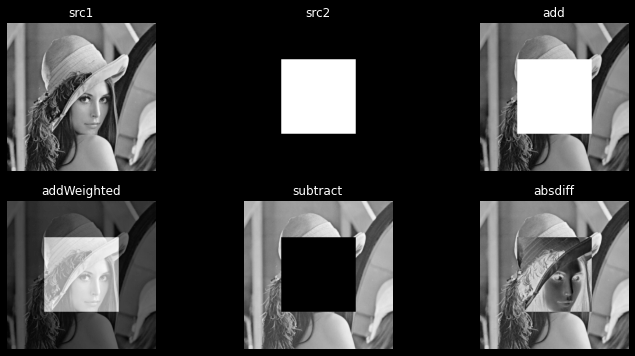

In [43]:
## 산술 연산 함수를 사용하여 실습해보기
import sys
import cv2
import matplotlib.pyplot as plt

source1 = cv2.imread("./images/lenna256.bmp", cv2.IMREAD_GRAYSCALE)
source2 = cv2.imread("./images/square.bmp", cv2.IMREAD_GRAYSCALE)

if source1 is None or source2 is None:
    print("Image load failed!")
    sys.exit()

destination1 = cv2.add(source1, source2, dtype=cv2.CV_8U)  # cv2.CV_8U = grayscale type
destination2 = cv2.addWeighted(source1, .5, source2, .5, 0.0)
destination3 = cv2.subtract(source1, source2)
destination4 = cv2.absdiff(source1, source2)

plt.figure(figsize=(12, 6))
plt.subplot(231), plt.axis("off"), plt.imshow(source1, "gray"), plt.title("src1")
plt.subplot(232), plt.axis("off"), plt.imshow(source2, "gray"), plt.title("src2")
plt.subplot(233), plt.axis("off"), plt.imshow(destination1, "gray"), plt.title("add")
plt.subplot(234), plt.axis("off"), plt.imshow(destination2, "gray"), plt.title("addWeighted")
plt.subplot(235), plt.axis("off"), plt.imshow(destination3, "gray"), plt.title("subtract")
plt.subplot(236), plt.axis("off"), plt.imshow(destination4, "gray"), plt.title("absdiff")
plt.show()

<hr>

### Bitwise AND, OR, XOR, NOT Operations[Logical] - 비트 단위 연산(논리 연산)
<hr>

> `비트단위 연산 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}bitwise\_and}(src1, src2, dst, mask) -> dst}$$
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}bitwise\_or}(src1, src2, dst, mask) -> dst}$$
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}bitwise\_xor}(src1, src2, dst, mask) -> dst}$$
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}bitwise\_not}(src, dst, mask) -> dst}$$

- src1 : 1st source. 첫 번째 영상 또는 스칼라
- src2 : 2nd source. 두 번째 영상 또는 스칼라
- dst : destination. 출력 영상
- mask : 마스크 영상(그레이스케일)
- 참고사항
    - 각각의 픽셀 값을 이진수로 표현하고, 비트(bit) 단위 논리 연산을 수행한다.

<hr>

## 3) Color Image & Color Space - 컬러 영상과 색 공간

<hr>

### Color Image for OpenCV - OpenCV 컬러 영상
- 컬러 영상은 3차원 `numpy.ndarray`로 표현한다. `img.shape = (h, w, 3)`
- OpenCV에서는 RGB 순서가아니라 `BGR` 순서를 기본으로 사용한다.
<hr>

- OpenCV에서 컬러 영상 다루기
    - `image1 = cv2.imread("lenna.bmp", cv2.IMREAD_COLOR)`
    - `image2 = np.zeros((480, 640, 3), np.uint8)`
    - `image3 = cv2.imread("lenna.bmp", cv2.IMREAD_GRAYSCALE)`
    - `image4 = cv2.cvtColor(image3, cv2.COLOR_GRAY2BGR)`
        - 이 경우 image4 영상의 각 픽셀은 B, G, R 색 성분 값이 모두 같게 설정된다.
        - 색상은 변경되지 않고 그대로 유지한 채 1채널에서 3채널로 변경된다고 생각하면 된다.
        - 1 byte by pixel to 3 bytes by pixel
<hr>

- RGB 색 공간
    - 빛의 삼원색인 빨간색(R), 녹색(G), 파란색(B)을 혼합하여 색상을 표현 한다.(가산 혼합, Additive Color Mixing)
    - TV & 모니터, 카메라 센서 Bayer 필터, 비트맵

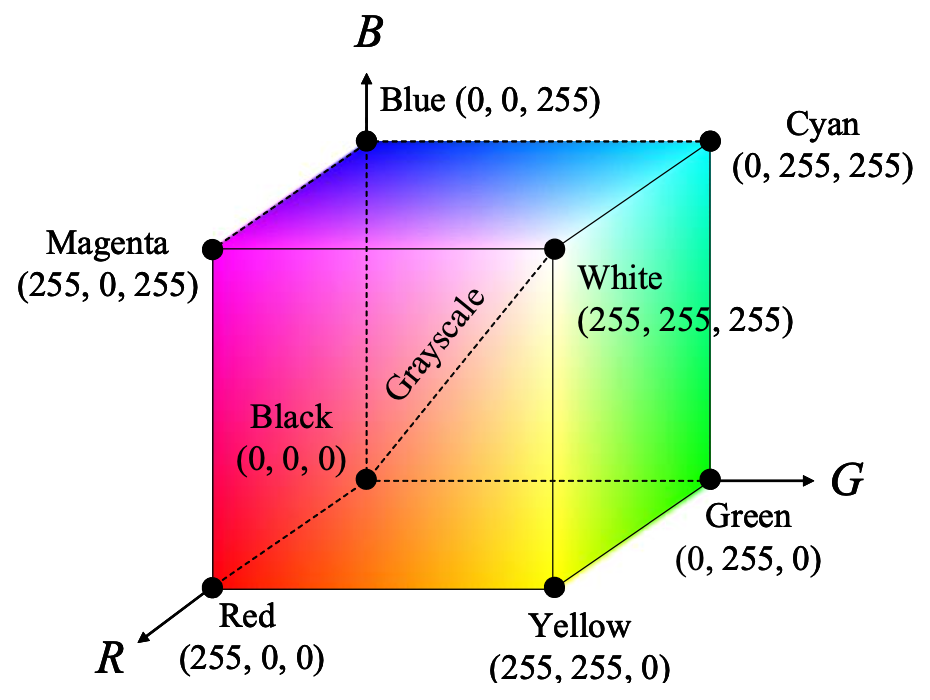

In [ ]:
from IPython.display import Image
Image("./images/color_space.png")  # color space

<hr>

### Separate & Combine of Color Channels - 색상 채널의 분리 & 결합
<hr>

> `(색상) 채널 분리 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}split}(m, mv) -> dst}$$
- m : matrix. 다채널 영상. (e.g.) (B, G, R)로 구성된 컬러 영상
- mv : matrix of vector. 출력 영상
- dst : destination. 출력 영상의 리스트
<hr>

> `(색상) 채널 결합 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}merge}(mv, dst) -> dst}$$
- mv : matrix of vector. 입력 영상 리스트 또는 튜플
- dst : destination. 출력 영상

In [ ]:
import cv2
help(cv2.split)

In [ ]:
import cv2
help(cv2.merge)

source.shape : (480, 640, 3)
source.dtype : uint8


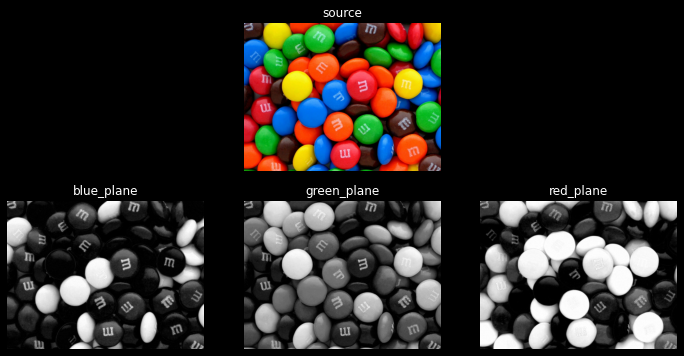

In [44]:
## RGB 색상 평면 나누어 출력해보기
import cv2
import matplotlib.pyplot as plt

# 컬러 영상 불러오기
source = cv2.imread("./images/candies.png")

# 컬러 영상 속성 확인
print("source.shape :", source.shape)  # (480, 640, 3)
print("source.dtype :", source.dtype)  # uint8 - 8bit Unsigned Integer

## RGB 색 평면 분할

# numpy 슬라이싱 방법
# blue_plane = source[:, :, 0]
# green_plane = source[:, :, 1]
# red_plane = source[:, :, 2]

# blue_plane, green_plane, red_plane = cv2.split(source)

# 위 두가지 방법에 의해 전역 변수를 3개 만드는 것 보단 하나로 만든 후
# 후에 인덱싱으로 호출하는 것이 좀 더 효율적으로 보인다.
planes = cv2.split(source)

# matplotlip
plt.figure(figsize=(12, 6))
plt.subplot(232), plt.axis("off"), plt.title("source"), plt.imshow(source[:,:,::-1])
plt.subplot(234), plt.axis("off"), plt.title("blue_plane"), plt.imshow(planes[0], "gray")
plt.subplot(235), plt.axis("off"), plt.title("green_plane"), plt.imshow(planes[1], "gray")
plt.subplot(236), plt.axis("off"), plt.title("red_plane"), plt.imshow(planes[2], "gray")
plt.show()

# OpenCV 가상 윈도우
cv2.imshow("source", source)
cv2.imshow("blue_plane", planes[0])
cv2.imshow("green_plane", planes[1])
cv2.imshow("red_plane", planes[2])

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

<hr>

### Color Space Conversion - 색 공간 변환
- 영상 처리에서는 특정한 목적을 위해 RGB 색 공간을 HSV, YCrCb, Grayscale 등의 다른 색 공간으로 변환하여 처리한다.
- OpenCV 색 공간 변환 방법
    - [OpenCV 문서 페이지](https://docs.opencv.org/master/de/d25/imgproc_color_conversions.html) 참고
<hr>

> `색 공간 변환 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}cvtColor}(src, code, dst, dstCn) -> dst}$$
- src : source. 입력 영상
- code : 색 변환 코드 ([OpenCV 문서 페이지](https://docs.opencv.org/4.x/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0) 참고)
- dstCn : 결과 영상의 채널 수. 0이면 자동 결정된다. 기본값은 0
- dst : 출력 영상
<hr>

- RGB 색상을 그레이스케일로 변환하는 수식
$$\mathsf{Y = 0.299R + 0.587G + 0.114B}$$
- RGB 순서로 약 3:6:1의 비율로 계산되는 것을 확인할 수 있다.
- 장점 : 데이터 저장 용량 감소, 데이터 처리 속도 향상
- 단점 : 색상 정보 손실

In [ ]:
help(cv2.cvtColor)

<hr>

### HSV(Hue, Saturation, Value) - 색상, 채도, 명도
<hr>

- HSV 색 공간
    - Hue : 색상, 색의 종류. 색상 정보를 각도로써 표현한다. (0˚ ~ 360˚)
    - Saturation : 채도, 색의 탁하고 선명한 정도
    - Value : 명도, 빛의 밝기
<hr>

- HSV 값 범위
    - cv2.CV_8U(8비트 부호 없는) 영상의 경우
        - 0 ≤ H ≤ 179
        - 0 ≤ S ≤ 255
        - 0 ≤ V ≤ 255
    - cv2.CV_32F(32비트 부동소수형) 영상의 경우
        - 0 ≤ H ≤ 360
        - 0 ≤ S ≤ 255 or 0 ≤ S ≤ 1
        - 0 ≤ V ≤ 255 or 0 ≤ S ≤ 1

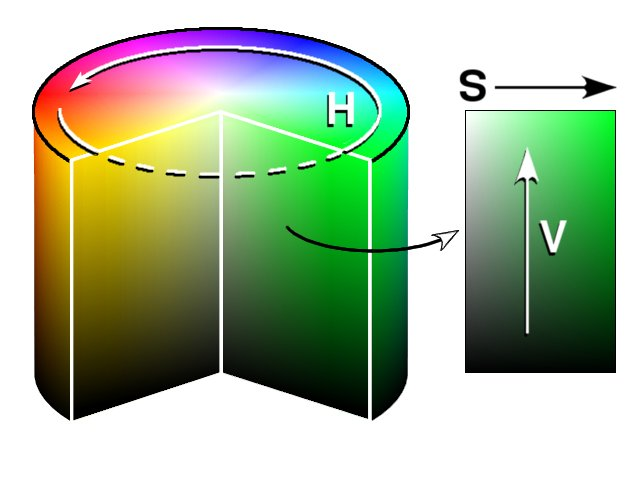

In [ ]:
from IPython.display import Image
Image("./images/HSV_cylinder.jpg")  # HSV cylinder

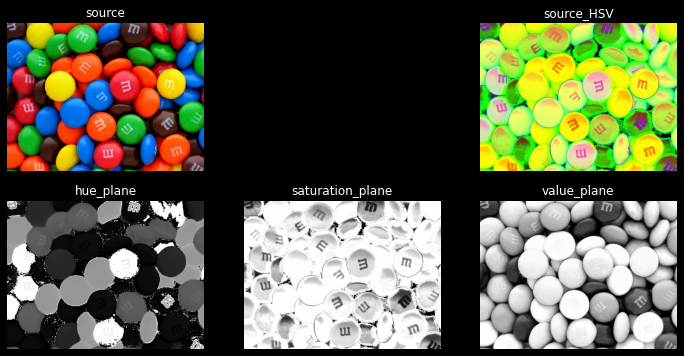

In [ ]:
## HSV 색상 정보를 H, S, V 각각의 색상 평면으로 출력하기
import cv2
import matplotlib.pyplot as plt

# 컬러 영상 불러오기
source = cv2.imread("./images/candies.png")
source_HSV = cv2.cvtColor(source, cv2.COLOR_BGR2HSV)

# HSV 색 평면 분할
planes = cv2.split(source_HSV)

# matplotlip
plt.figure(figsize=(12, 6))
plt.subplot(231), plt.axis("off"), plt.title("source"), plt.imshow(source[:,:,::-1])
plt.subplot(233), plt.axis("off"), plt.title("source_HSV"), plt.imshow(source_HSV[:,:,::-1])
plt.subplot(234), plt.axis("off"), plt.title("hue_plane"), plt.imshow(planes[0], "gray")
plt.subplot(235), plt.axis("off"), plt.title("saturation_plane"), plt.imshow(planes[1], "gray")
plt.subplot(236), plt.axis("off"), plt.title("value_plane"), plt.imshow(planes[2], "gray")
plt.show()

# OpenCV 가상 윈도우
cv2.imshow("source", source)
cv2.imshow("source_HSV", source_HSV)
cv2.imshow("hue_plane", planes[0])
cv2.imshow("saturation_plane", planes[1])
cv2.imshow("value_plane", planes[2])

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

<hr>

### YCrCb(Luminance, Chrominance) - 휘도, 색차
- OpenCV에서 제공하는 색 변환 코드는 YCbCr이 아니라 YCrCb로 되어 있다.
<hr>

- YCrCb 색 공간
    - PAL, NTSC, SECAM 등의 컬러 비디오 표준에 사용되는 색 공간
    - 영상의 밝기 정보와 색상 정보를 따로 분리하여 부호화 (흑백 TV 호환)
    - Y : 밝기 정보(luma), 그레이스케일 영상과 동일한 평면
    - Cr, Cb : 색차(chroma)
<hr>

- YCrCb 값 범위
    - cv2.CV_8U(8비트 부호 없는) 영상의 경우
    - 0 ≤ Y ≤ 255
    - 0 ≤ Cr ≤ 255
    - 0 ≤ Cb ≤ 255
<hr>

- YUV / Y′UV / YCbCr 의 차이
    - Y′는 루마 컴포넌트(밝기)를 대표하며 U와 V는 크로미넌스(색) 컴포넌트를 대표한다.<br>
휘도는 Y로 나타내며 루마는 Y′로 나타낸다. 프라임 부호(′)는 감마 압축을 나타내며<br>
여기서 휘도는 물리적인 선형 공간 밝기를 의미하고 루마는 (비선형) 지각 밝기를 의미한다.
    - Y′UV, YUV, YCbCr, YPbPr 등의 용어의 범위가 모호하고 겹치는 부분이 있다. 역사적으로 `YUV`와 `Y'UV`는<br> 
방송 시스템의 색 정보의 특정 "`아날로그 인코딩`"용으로 사용된 반면 `YCbCr`은 비디오 및 스틸 이미지 압축과 전송<br>
(예: MPEG, JPEG)에 적합한 색 정보의 `디지털 인코딩`에 사용되었다.<br>
오늘날 `YUV`라는 용어는 `YCbCr`을 사용하여 인코딩되는 파일 포맷을 기술하기 위해 컴퓨터 산업에서 흔히 사용되고 있다.
        - `출처` : [YUV, 위키백과](https://ko.wikipedia.org/wiki/YUV)
<hr>

- YCbCr / YPbPr 의 차이
    - YCbCr은 영상 시스템에서 사용되는 색공간의 일종이다. Y 는 휘도 성분이며 Cb 와 Cr 은 색차 성분이다.<br>
    YCbCr 은 가끔 YCC 라고 줄여 부르기도 한다. YCbCr 은 절대 색공간 이 아니며 RGB 정보를 인코딩하는<br>
    방식의 하나로, 실제로 보이는 이미지의 색은 신호를 디스플레이 하기 위해 사용된 원본 RGB 정보에 의존한다.
    - (신호를 디지털 형식으로 변경하기 위해 스케일링과 오프셋 조정 단계를 거치기 이전의) YCbCr 신호는<br>
    YPbPr 이라고 하며, 이것은 감마 보정된 RGB 원본 영상에서 Kb 와 Kr 이라는 두가지 상수를 이용하여<br>
    다음과 같은 공식을 통해 얻을 수 있다.
        - `출처` : [YCbCr, 위키백과](https://ko.wikipedia.org/wiki/YCbCr)
$$\mathsf{Y^\prime = K_R · R^\prime + K_G · G^\prime + K_B · B^\prime}$$
$$\mathsf{P_B = \frac{1}{2} · \frac{B^\prime - Y^\prime}{1 - K_B}}$$
$$\mathsf{P_R = \frac{1}{2} · \frac{R^\prime - Y^\prime}{1 - K_R}}$$
<hr>

- NOTE : 아직 완벽하게 이해가 가지 않는다. 그럼 OpenCV에서 제공하는 색 변환 코드에 YUV는 언제 쓰는거지..

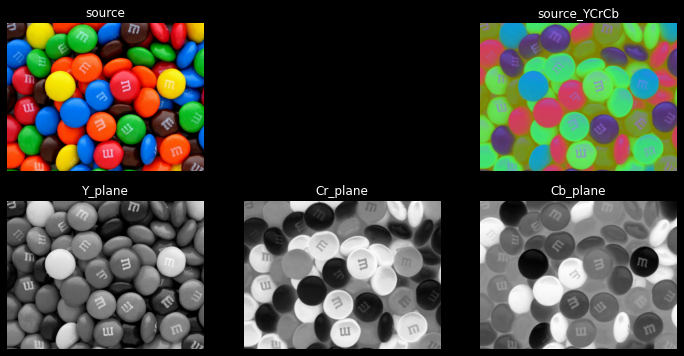

In [ ]:
## YCrCb 색상 정보를 Y, Cr, Cb 각각의 색상 평면으로 출력하기
import cv2
import matplotlib.pyplot as plt

source = cv2.imread("./images/candies.png")
source_YCrCb = cv2.cvtColor(source, cv2.COLOR_BGR2YCrCb)

# YCrCb 색 평면 분할
planes = cv2.split(source_YCrCb)

# matplotlip
plt.figure(figsize=(12, 6))
plt.subplot(231), plt.axis("off"), plt.title("source"), plt.imshow(source[:,:,::-1])
plt.subplot(233), plt.axis("off"), plt.title("source_YCrCb"), plt.imshow(source_YCrCb[:,:,::-1])
plt.subplot(234), plt.axis("off"), plt.title("Y_plane"), plt.imshow(planes[0], "gray")  # 그레이스케일 영상과 동일
plt.subplot(235), plt.axis("off"), plt.title("Cr_plane"), plt.imshow(planes[1], "gray")
plt.subplot(236), plt.axis("off"), plt.title("Cb_plane"), plt.imshow(planes[2], "gray")
plt.show()

# OpenCV 가상 윈도우
cv2.imshow("source", source)
cv2.imshow("source_YCrCb", source_YCrCb)
cv2.imshow("Y_plane", planes[0])
cv2.imshow("Cr_plane", planes[1])
cv2.imshow("Cb_plane", planes[2])

cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

<hr>

## 4) Histogram analysis - 히스토그램 분석

<hr>

### Histogram - 데이터의 분포도
<hr>

- 통계학에서 어떠한 데이터의 분포를 그래프의 형태로 표현하는 방법
- 영상처리에서는 영상의 픽셀 값 분포를 그래프의 형태로 표현한 것
- (e.g.) 그레이스케일 영상에서 각 그레이스케일 값에 해당하는 픽셀의 개수를 구하고, 이를 막대 그래프의 향태로 표현한다.
<hr>

- 히스토그램 수식
$$\mathsf{h(g) = N_g}$$
<hr>

- 정규화된 히스토그램(Normalized histogram)
    - 각 픽셀의 개수를 영상 전체 픽셀 개수로 나누어준 것
    - 해당 그레이스케일 값을 갖는 픽셀이 나타날 `확률`
<hr>

- 정규화 수식
$$\mathsf{p(g) = \frac{N_g}{w\times h}} \Rrightarrow \sum_{g=0}^{L-1} \mathsf{p(g)} = 1$$
<hr>

> `히스토그램 구하기 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}calcHist}(images, channels, mask, histSize, ranges, hist, accumulate) -> hist}$$
- images : 입력 영상 리스트
- channels : 히스토그램을 구할 채널을 나타내는 리스트
    - [0] : grayscale
    - [0, 1, 2] : 순서대로 B, G, R
    - (e.g.) 컬러 영상에서 B, R 채널에 대해서만 히스토그램을 구하고 싶다면 [0, 2]로 지정한다.
- mask : 마스크 영상. 입력 영상 전체에서 히스토그램을 구하려면 `None`지정
- histSize : 히스토그램 각 차원의 크기(빈(bin)의 개수)를 나타내는 리스트
    - (e.g.) 그레이스케일 영상의 히스토그램을 구할 때, 보통 차원의 크기로는 256(0 ~ 255)을 지정한다.<br>
그렇지만 만약에 반값인 128로 지정한다면 `256 / 128 = 2`를 한 세트로하여 히스토그램을 구한다.
    - (i.e.) 정리하자면 `histSize 에 전달한 값에 따라 차원의 크기 / 전달값`을 하나의 `bin`으로 한다.
- ranges : 히스토그램 각 차원의 최솟값과 최댓값으로 구성된 리스트
    - (i.e.) 영상에서 측정하려는 픽셀값의 범위로써, 특정 픽셀값 영역에 대해서만 분석하게 할 수도 있다.<br>
리스트를 작성하는 방법으로는 지정한 채널의 순서대로 [0, 256, 0, 256]의 형태로 최소/최대값을 지정한다.
- hist : 계산된 히스토그램(`numpy.adarray`)
- accumulate : 기존의 hist 히스토그램에 누적하려면 True, 새로 만들려면 False(기본값)
<hr>

- bin
    - 통상, 뚜껑이 달린 통, 저장 용기(저장소) 등을 가리키는 말
    - 또한, 균일 간격의 분할을 의미하기도 함

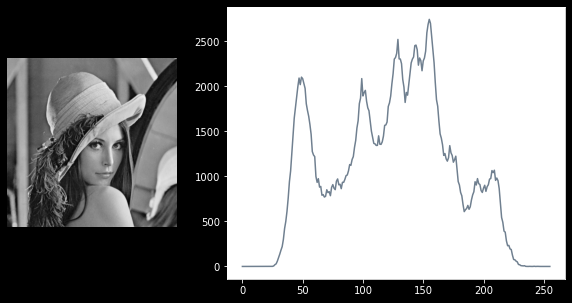

In [63]:
## 그레이스케일 영상의 히스토그램 구하기
import cv2
import matplotlib.pyplot as plt

source = cv2.imread("./images/lenna.bmp", cv2.IMREAD_GRAYSCALE)  # load image as grayscale

histogram = cv2.calcHist([source], [0], None, [256], [0, 256])  # get histogram

# pyplot init
plt.rcParams['axes.facecolor'] = "white"
plt.figure(figsize=(10, 5))  # set plot size
gridspec = plt.GridSpec(
    nrows=1, ncols=2, width_ratios=[1, 2]
    )  # set plots count & each of the plots ratio

# show with pyplot
plt.subplot(gridspec[0]), plt.axis("off"), plt.imshow(source, "gray")
plt.subplot(gridspec[1]), plt.plot(histogram, color="SlateGray")
plt.show()

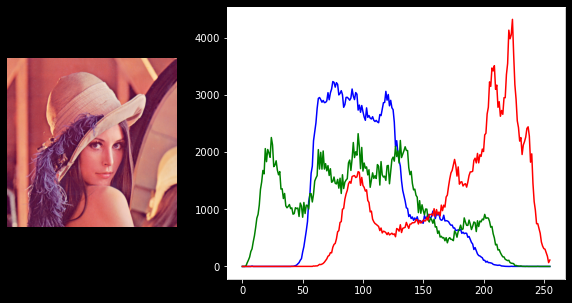

In [48]:
## 컬러 영상의 히스토그램 구하기
import cv2
import matplotlib.pyplot as plt

source = cv2.imread("./images/lenna.bmp")  # load image as colors

colors = ["b", "g", "r"]  # color image channels
BGR_planes = cv2.split(source)  # list of color planes

# pyplot init
plt.figure(figsize=(10, 5))  # plot size
gridspec = plt.GridSpec(
    nrows=1, ncols=2, width_ratios=[1, 2]
    )  # set plots count & each of the plots ratio

# show with pyplot
plt.subplot(gridspec[0]), plt.axis("off"), plt.imshow(source[:,:,::-1])
plt.subplot(gridspec[1])
for (plane, color_) in zip(BGR_planes, colors):
    histogram = cv2.calcHist([plane], [0], None, [256], [0, 256])
    plt.plot(histogram, color=color_)
plt.show()

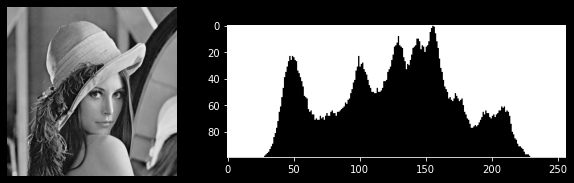

In [49]:
## OpenCV 그리기 함수로 그레이스케일 영상의 히스토그램 나타내기
import cv2
import numpy as np
import matplotlib.pyplot as plt

def get_gray_hist_image(histogram):  # make histogram image using OpenCV drawing function
    image_hist = np.full((100, 256), 255, dtype=np.uint8)
    
    hist_max = np.max(histogram)
    for x in range(256):
        point1 = (x, 100)
        point2 = (x, 100 - int(histogram[x, 0] * 100 / hist_max))  # 0 ≤ x ≤ 255, 0 ≤ y ≤ 100
        cv2.line(image_hist, point1, point2, 0)
    
    return image_hist

source = cv2.imread("./images/lenna.bmp", cv2.IMREAD_GRAYSCALE)  # load image as grayscale

histogram_ = cv2.calcHist([source], [0], None, [256], [0, 256])  # get histogram

histogram_output = get_gray_hist_image(histogram_)  # get histogram image

# pyplot init
plt.figure(figsize=(10, 5))
gridspec = plt.GridSpec(nrows=1, ncols=2, width_ratios=[1, 2])

# show with pyplot
plt.subplot(gridspec[0]), plt.axis("off"), plt.imshow(source, "gray")
plt.subplot(gridspec[1]), plt.imshow(histogram_output, "gray")
plt.show()

# show with OpenCV window
cv2.imshow('source', source)
cv2.imshow('histogram', histogram_output)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

<hr>

## 5) Contrast control of images - 영상의 명암비 조절
<hr>

- 명암비(Contrast)란
    - 밝은 곳과 어두운 곳 사이에 드러나는 밝기 정도의 차이
    - 대비(對比) 또는 콘트라스트(contrast)는 물체를 다른 물체와 배경과 구별할 수 있게 만들어 주는<br>
시각적인 특성의 차이를 말한다. 실생활의 시각에서 대비는 같은 시야 속에서 한 물체와<br>
다른 물체의 색과 밝기의 차이로 결정된다.
        - `출처` : [대비, 위키백과](https://ko.wikipedia.org/wiki/%EB%8C%80%EB%B9%84_(%EA%B7%B8%EB%A6%BC))
<hr>

- 기본적인 명암비 조절 수식
$$\mathsf{dst(x, y) = saturate(s · src(x, y))}$$
<hr>

- 효과적인 명암비 조절 수식
$$\mathsf{dst(x, y) = saturate(src(x, y) + (src(x, y) - 128) · \alpha)}$$

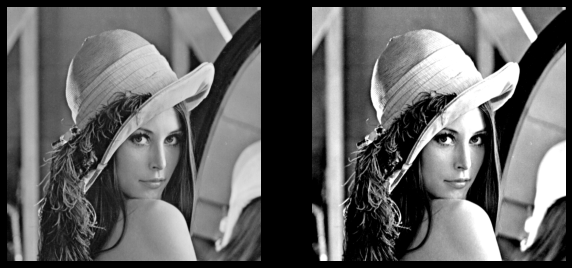

-1

In [6]:
## 기본적인 명암비 조절 예제
import cv2
import matplotlib.pyplot as plt
import numpy as np

source = cv2.imread("./images/lenna.bmp", cv2.IMREAD_GRAYSCALE)  # load image as grayscale

ALPHA = 1.0  # constant
destination = np.clip(a=(1+ALPHA)*source - 128*ALPHA, a_min=0, a_max=255).astype(np.uint8)

# pyplot init
plt.figure(figsize=(10, 5))

# show with pyplot
plt.subplot(121), plt.axis("off"), plt.imshow(source, "gray")
plt.subplot(122), plt.axis("off"), plt.imshow(destination, "gray")
plt.show()

# show with OpenCV window
cv2.imshow("source", source)
cv2.imshow("contrast", destination)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

<hr>

### Histogram stretching - 히스토그램 스트레칭
- 영상의 히스토그램이 그레이스케일 전 구간에서 걸쳐 나타나도록 변경하는 선형 변환 기법
<hr>

> `정규화 함수`
$$\mathsf{{\color{RoyalBlue}cv2.}{\color{Tan}normalize}(src, dst, alpha, beta, norm_type, dtype, mask) -> dst}$$
- src : source. 입력 영상
- dst : destination. 결과 영상
- alpha : (노름 정규화인 경우) 목표 노름 값,<br>
(원소 값 범위 정규화인 경우) 최솟값
- beta : (원소 값 범위 정규화인 경우) 최댓값
- norm_type : normalization type. 정규화 타입
    - NORM_INF, NORM_L1, NORM_L2, NORM_MINMAX
- dtype : data type. 결과 영상의 타입
- mask : 마스크 영상
<hr>

- 히스토그램 스트레칭 변환 함수
    - 변환 함수의 직선의 방정식 구하기

$$\mathsf{기울기 : \frac{255}{G_{max} - G_{min}}}$$
$$\mathsf{y 절편 : - \frac{255\times G_{min}}{G_{max} - G_{min}}}$$
$$\begin{align} 
\mathsf{g(x, y)} & = \mathsf{\frac{255}{G_{max} - G_{min}}\times f(x, y) - \frac{255\times G_{min}}{G_{max} - G_{min}}} \\ 
& = \mathsf{\frac{f(x, y) - G_{min}}{G_{max} - G_{min}}\times 255} \\ 
\end{align}$$
<hr>

- 변환 함수의 직선의 방정식 요약
$$\begin{align}
\mathsf{g(x)} & = \mathsf{a · f(x) - b} \\
\mathsf{a} & = \mathsf{기울기} \\
\mathsf{b} & = \mathsf{y 절편} \\
\end{align}$$

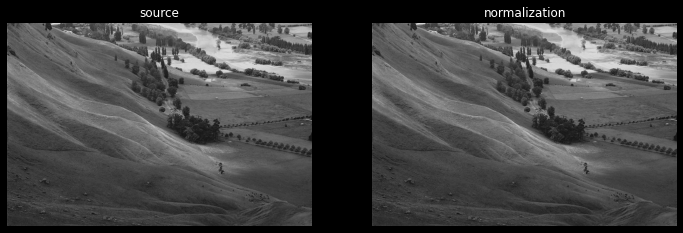

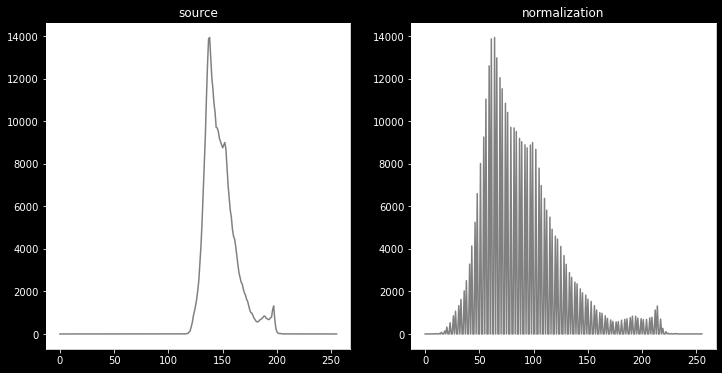

-1

In [30]:
## 히스토그램 스트레칭을 이용한 명암비 자동 조절
import cv2
import matplotlib.pyplot as plt
import numpy as np

source = cv2.imread("./images/Hawkes.jpg", cv2.IMREAD_GRAYSCALE)  # load image as grayscale

destination = cv2.normalize(source, None, 0, 255, cv2.NORM_MINMAX)  # normalization

# pyplot init
plt.figure(figsize=(12, 6))
# show with pyplot
plt.subplot(121), plt.axis("off"), plt.title("source"), plt.imshow(source, "gray")
plt.subplot(122), plt.axis("off"), plt.title("normalization"), plt.imshow(destination, "gray")
plt.show()

# get histogram
hist_src = cv2.calcHist([source], [0], None, [256], [0, 256])
hist_norm = cv2.calcHist([destination], [0], None, [256], [0, 256])

# pyplot init
plt.figure(figsize=(12, 6))
# show with pyplot
plt.subplot(121, facecolor="white"), plt.title("source"), plt.plot(hist_src, color="Gray")
plt.subplot(122, facecolor="white"), plt.title("normalization"), plt.plot(hist_norm, color="Gray")
plt.show()

# show with OpenCV window
cv2.imshow("source", source)
cv2.imshow("normalization", destination)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.waitKey(1)

#### NOTE : 정규화 전후 모습이 matplotlib으로 출력했을 때는 티가 잘 안 난다.
#### 히스토그램을 만들어보니 정규화 작업은 재대로 된 듯 하다.
#### 참고로 OpenCV 가상 윈도우에서는 확연하게 차이가 나게 출력된다.
#### When the before and after normalization is output with matplotlib, it is not very noticeable.
#### But it seems that the normalization works well when i saw the histogram.
#### For reference, the normalization output is clearly different in the OpenCV virtual window.

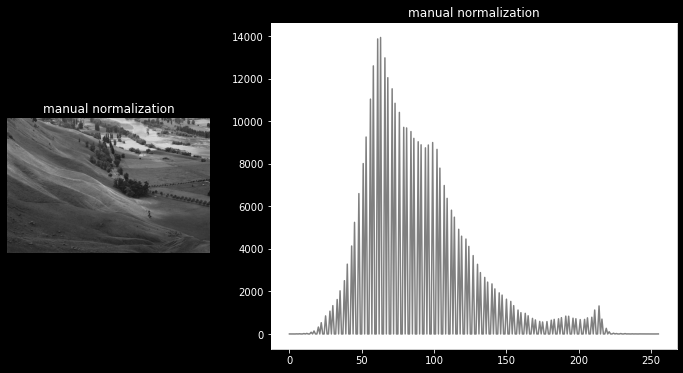

In [40]:
## manually normalize
import cv2
import matplotlib.pyplot as plt

source = cv2.imread("./images/Hawkes.jpg", cv2.IMREAD_GRAYSCALE)  # load image as grayscale
G_min, G_max, _, _ = cv2.minMaxLoc(source)  # bins min & max
manual_normalization = ((source - G_min) * 255. / (G_max - G_min)).astype(np.uint8)  # normalization
hist_norm_manual = cv2.calcHist([manual_normalization], [0], None, [256], [0, 256])  # get histogram
# show with pyplot
plt.figure(figsize=(12, 6))  # plot size
gridspec = plt.GridSpec(
    nrows=1, ncols=2, width_ratios=[1, 2]
    )  # set plots count & each of the plots ratio
plt.subplot(gridspec[0]), plt.axis("off"), plt.title("manual normalization"), plt.imshow(manual_normalization, "gray")
plt.subplot(gridspec[1], facecolor="white"), plt.title("manual normalization"), plt.plot(hist_norm_manual, color="Gray")
plt.show()